# Insurance Claim Estimation - Medical Cost Personal Dataset
## Author: Erdem Tosun

### ======================================
### 1. Installing Required Libraries
### ======================================


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import joblib
import warnings
warnings.filterwarnings('ignore')

### ======================================
### 2. Data Upload and Review
### ======================================


In [4]:
df = pd.read_csv("insurance.csv")
print("Dataset columns:", df.columns.tolist())
print("\nFirst 5 Record:")
print(df.head())

print("\nInformations about dataset:")
print(df.info())

print("\nNull Values:")
print(df.isnull().sum())

Dataset columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First 5 Record:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informations about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), o

### ======================================
### 3. Data Visualization
### ======================================


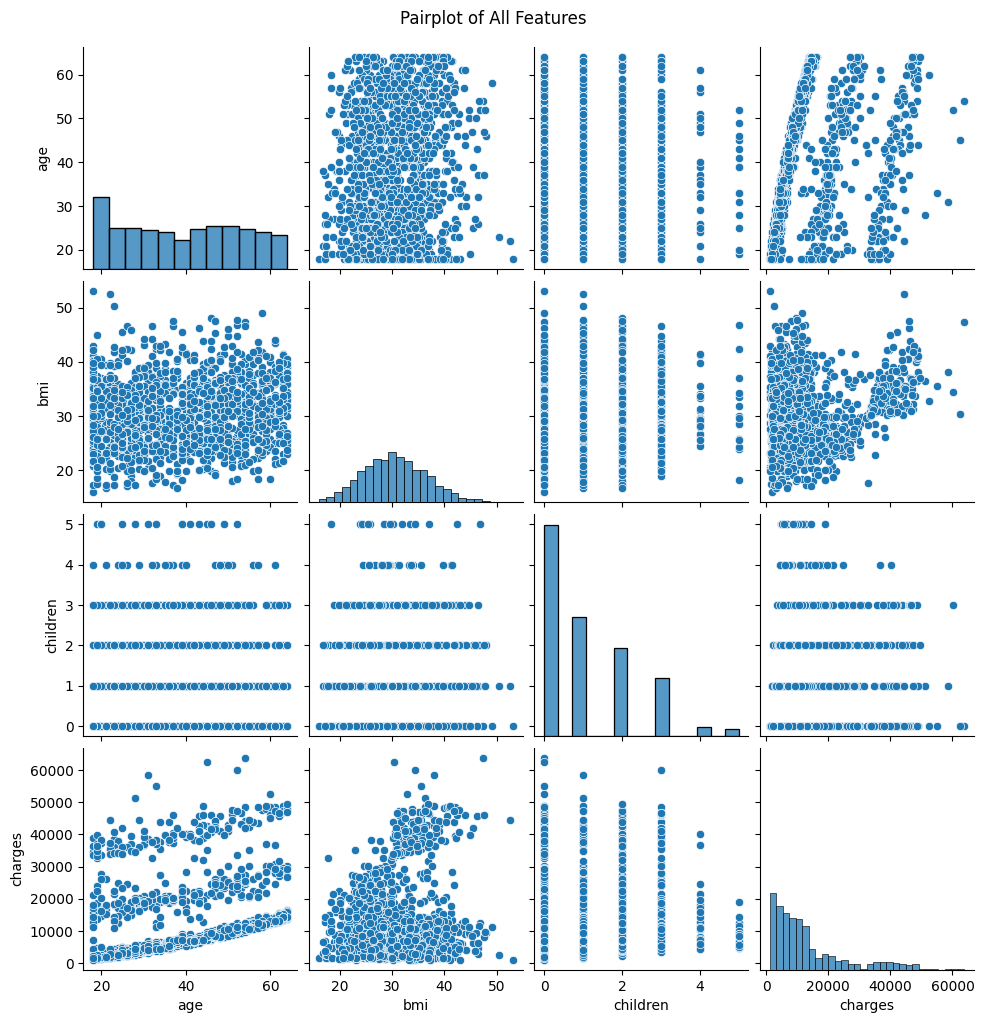

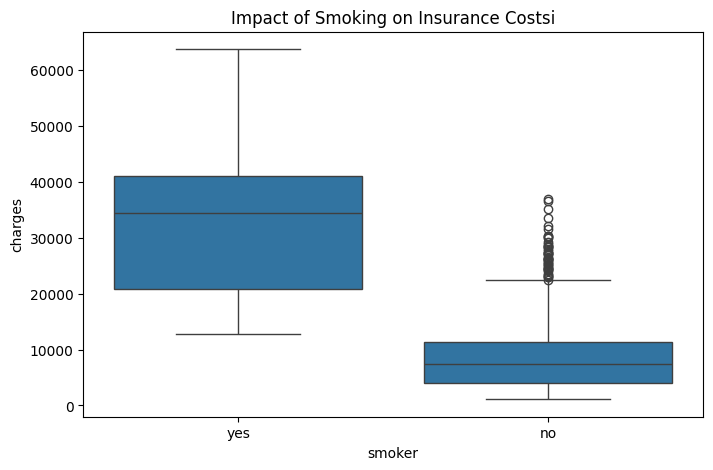

In [6]:
sns.pairplot(df)
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Impact of Smoking on Insurance Costsi")
plt.show()

### ======================================
### 4. Preparing Data
### ======================================


In [7]:
X = df.drop("charges", axis=1)
y = df["charges"]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
])

X_prepared = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

### ======================================
### 5. Training Models
### ======================================


In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"model": model, "mse": mse, "r2": r2}
    print(f"\nModel: {name}")
    print(f"MSE: {mse:.2f} | R²: {r2:.4f}")


Model: Linear Regression
MSE: 33596915.85 | R²: 0.7836

Model: Ridge
MSE: 33645391.30 | R²: 0.7833

Model: Lasso
MSE: 33597003.10 | R²: 0.7836


### ======================================
### 6. Feature Importance
### ======================================


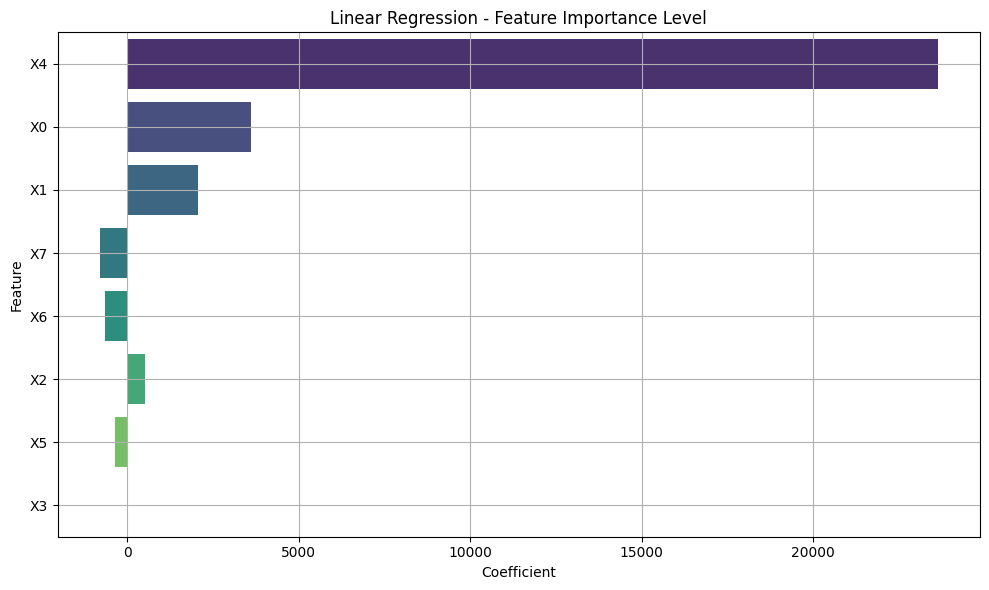

In [14]:
if hasattr(results[best_model_name]['model'], 'feature_names_in_'):
    features = results[best_model_name]['model'].feature_names_in_
else:
    features = [f"X{i}" for i in range(len(coef))]

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Grafik
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Coefficient', y='Feature', palette='viridis')
plt.title(f"{best_model_name} - Feature Importance Level")
plt.grid()
plt.tight_layout()
plt.show()


### ======================================
### 7. Choosing Best Model and Saving
### ======================================


In [15]:
best_model_name = max(results, key=lambda k: results[k]["r2"])
best_model = results[best_model_name]["model"]

print(f"\n Best model: {best_model_name}")

joblib.dump(best_model, "models/insurance_best_model.pkl")
joblib.dump(preprocessor, "models/insurance_preprocessor.pkl")



 Best model: Linear Regression


['models/insurance_preprocessor.pkl']